In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv(r'C:\Users\Shiv n\OneDrive\Desktop\py\bike_buyers.csv', encoding = 'unicode_escape')
df.head()

,ï»¿ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [3]:
df.duplicated().sum()

0

In [11]:
def isnullcheck(data):
    result = []
    for i in data.columns:
        if data[i].isnull().sum() > 0:
            result.append(i)
            
    return result

In [12]:
isnullcheck(df)

['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿ID             1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [17]:
numeric_attributes = df.select_dtypes(include = ['int64', 'float64'])
numeric_attributes.head()

,ï»¿ID,Income,Children,Cars,Age
0,12496,40000.0,1.0,0.0,42.0
1,24107,30000.0,3.0,1.0,43.0
2,14177,80000.0,5.0,2.0,60.0
3,24381,70000.0,0.0,1.0,41.0
4,25597,30000.0,0.0,0.0,36.0


<Axes: >

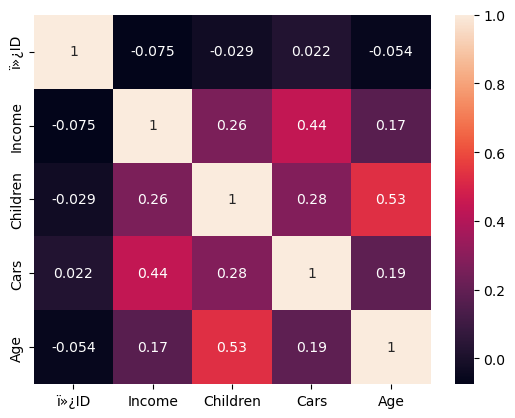

In [18]:
sns.heatmap(numeric_attributes.corr(), annot= True)

In [73]:
numeric_attributes.isnull().sum()     # numeric_attribute is having null values

ï»¿ID       0
Income      6
Children    8
Cars        9
Age         8
dtype: int64

In [74]:
# Drop rows with null or missing values in the numeric_attribute so that numeric_attributes contain NO null values

numeric_attributes2 = numeric_attributes.dropna()
numeric_attributes2.isnull().sum()

ï»¿ID       0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

In [59]:
dfm = df.copy()
dfm.head()

,ï»¿ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [77]:
# iterating through columns in order to update each numeric column individually.

for col in numeric_attributes2.columns:
    dfm[col] = numeric_attributes2[col]       #  dfm[col] is replaced with numeric_attributes2[col]                   

dfm.isnull().sum()

ï»¿ID               29
Marital Status       7
Gender              11
Income              29
Children            29
Education            0
Occupation           0
Home Owner           4
Cars                29
Commute Distance     0
Region               0
Age                 29
Purchased Bike       0
dtype: int64

every numeric attribute or columns of dfm now contain same number of values 

In [78]:
for col in ['Marital Status', 'Gender', 'Home Owner']:
    mode = dfm[col].mode()[0]
    dfm[col].fillna(mode, inplace= True)          # null values are getting replaced with mode value of their columns
    
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿ID             971 non-null    float64
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            971 non-null    float64
 4   Children          971 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              971 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               971 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(5), object(8)
memory usage: 101.7+ KB


In [82]:
dfmf = dfm.dropna()
dfmf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿ID             971 non-null    float64
 1   Marital Status    971 non-null    object 
 2   Gender            971 non-null    object 
 3   Income            971 non-null    float64
 4   Children          971 non-null    float64
 5   Education         971 non-null    object 
 6   Occupation        971 non-null    object 
 7   Home Owner        971 non-null    object 
 8   Cars              971 non-null    float64
 9   Commute Distance  971 non-null    object 
 10  Region            971 non-null    object 
 11  Age               971 non-null    float64
 12  Purchased Bike    971 non-null    object 
dtypes: float64(5), object(8)
memory usage: 106.2+ KB


In [83]:
categorical_attributes = dfmf.select_dtypes(include = ['object'])
categorical_attributes.head()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Yes
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes


In [88]:
nc = dfmf.select_dtypes(include = ['float64'])
nc.head()

,ï»¿ID,Income,Children,Cars,Age
0,12496.0,40000.0,1.0,0.0,42.0
1,24107.0,30000.0,3.0,1.0,43.0
2,14177.0,80000.0,5.0,2.0,60.0
3,24381.0,70000.0,0.0,1.0,41.0
4,25597.0,30000.0,0.0,0.0,36.0


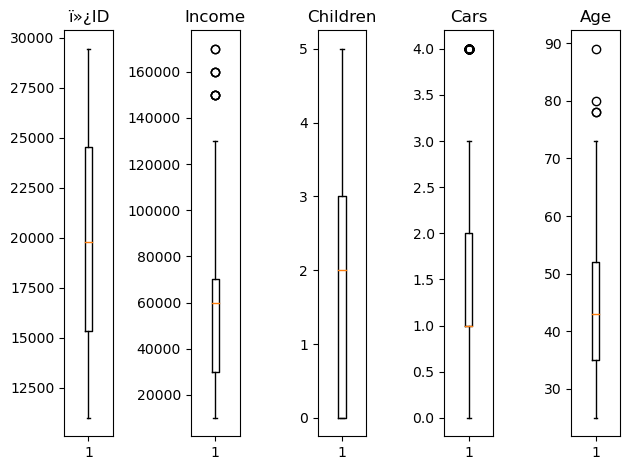

In [105]:
num_cols = len(nc.columns)
num_rows = math.ceil(num_cols / 5)      # Adjust the number of columns per row as needed

for i, val in enumerate(nc.columns):
    plt.subplot(num_rows, 5, i+1)
    plt.boxplot(nc[val])
    plt.title(val)
    
    
plt.tight_layout()   
plt.show()

In [114]:
from scipy import stats

z_score = stats.zscore(dfmf[['Income', 'Age']])
threshold = 3                                      # data points more than 3 standard deviations from the mean, [threshold = 3]
outliers = (abs(z_score) > threshold).any(axis= 1)    # .any(axis=1) checks each row to see if any value in that row is True.
dfmf[outliers]

,ï»¿ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974.0,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
43,17185.0,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
121,15922.0,Married,Male,150000.0,2.0,High School,Professional,Yes,4.0,0-1 Miles,Europe,48.0,No
178,14191.0,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes
259,12705.0,Married,Male,150000.0,0.0,Bachelors,Management,Yes,4.0,0-1 Miles,Pacific,37.0,Yes
321,16675.0,Single,Female,160000.0,0.0,Graduate Degree,Management,No,3.0,0-1 Miles,Pacific,47.0,Yes
356,23608.0,Married,Female,150000.0,3.0,High School,Professional,Yes,3.0,0-1 Miles,Europe,51.0,Yes
375,15628.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,1.0,0-1 Miles,Europe,89.0,No
401,11555.0,Married,Female,40000.0,1.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,80.0,No
829,16009.0,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No
